In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
import cv2
from IPython.display import clear_output

In [37]:
import sys, os
script_dir = sys.path[0]
print(script_dir)

C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project


In [38]:
#Constant zone
IMG_PATH_TRAIN = os.path.join(script_dir+r'\train')
IMG_PATH_TEST = os.path.join(script_dir+r'\test1')
IMG_PATH_TRAIN_MOD = os.path.join(script_dir+r'\train_modified')
IMG_PATH_TEST_MOD = os.path.join(script_dir+r'\test_modified')
print("Train path:",IMG_PATH_TRAIN+"\n")
print("Test path:",IMG_PATH_TEST+"\n")
print("Modified train path:",IMG_PATH_TRAIN_MOD+"\n")
print("Modified test path:",IMG_PATH_TEST_MOD)

MODIFIED_WIDTH = 100
MODIFIED_HEIGHT = 100

Train path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\train

Test path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\test1

Modified train path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\train_modified

Modified test path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\test_modified


In [7]:
#Function zone

def modify_img(image, new_width, new_height): #Modifies an image according to chosen parameters
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    modified_img = cv2.resize(gray_img, (new_width, new_height))
    return modified_img

def read_img(picture_path, filename): #Reads file from path
    return cv2.imread(picture_path+"/"+filename, -1)

def write_img(destination_path, filename, image): #Writes new file to given path
    cv2.imwrite(destination_path+"/"+filename, image)
     
def modify_train(): #Modifies the train data and writes it to the appropriate directory
    count = 0
    for f in os.listdir(IMG_PATH_TRAIN):
        img = read_img(picture_path = IMG_PATH_TRAIN, filename = f)
        mod_img = modify_img(img, new_width = MODIFIED_WIDTH, new_height = MODIFIED_HEIGHT)
        write_img(destination_path = IMG_PATH_TRAIN_MOD, filename = f, image = mod_img)
        msg = "Modified {0}% of training data".format(int(count/250))
        print(msg)
        clear_output(wait=True)
        count += 1

    print("Train data modification complete")
    
def modify_test(): #Modifies the test data and writes it to the appropriate directory
    count = 0
    for f in os.listdir(IMG_PATH_TEST):
        img = read_img(picture_path = IMG_PATH_TEST, filename = f)
        mod_img = modify_img(img, new_width = MODIFIED_WIDTH, new_height = MODIFIED_HEIGHT)
        write_img(destination_path = IMG_PATH_TEST_MOD, filename = f, image = mod_img)
        msg = "Modified {0}% of testing data".format(int(count/250))
        print(msg)
        clear_output(wait=True)
        count += 1

    print("Test data modification complete")
      
@jit(nogil = True)
def images_to_df_train(): #Returns dataframe of the train files
    train_array = np.ndarray(shape = (0,MODIFIED_WIDTH,MODIFIED_HEIGHT), dtype= 'uint8')
    count = 0
    for f in os.listdir(IMG_PATH_TRAIN_MOD):
        img = read_img(picture_path = IMG_PATH_TRAIN_MOD, filename = f)
        train_array = np.insert(train_array, count , img.reshape((1,MODIFIED_WIDTH,MODIFIED_HEIGHT)), axis = 0)
        msg = "Loaded {0} images. {1}%".format(count, count/250)
        print(msg)

        clear_output(wait=True)
        count += 1
    print("Data loading complete")
    train_df = pd.DataFrame(data = train_array.reshape(25000, MODIFIED_WIDTH*MODIFIED_HEIGHT))
    print("Train dataframe loading complete")
    return train_df

@jit(nogil = True)
def images_to_df_test(): #Returns dataframe of the test files
    test_array = np.ndarray(shape = (0,MODIFIED_WIDTH,MODIFIED_HEIGHT), dtype= 'uint8')
    count = 0
    for f in os.listdir(IMG_PATH_TEST_MOD):
        img = read_img(picture_path = IMG_PATH_TEST_MOD, filename = f)
        test_array = np.insert(test_array, count , img.reshape((1,MODIFIED_WIDTH,MODIFIED_HEIGHT)), axis = 0)
        msg = "Loaded {0} images. {1}%".format(count, count/125)
        print(msg)

        clear_output(wait=True)
        count += 1
    print("Data loading complete")
    test_df = pd.DataFrame(data = test_array.reshape(12500, MODIFIED_WIDTH*MODIFIED_HEIGHT))
    print("Test dataframe loading complete")
    return test_df

In [35]:
# colored_img = cv2.imread(IMG_PATH_TRAIN+"/"+"cat.0.jpg")
# gray_img = cv2.cvtColor(colored_img, cv2.COLOR_BGR2GRAY)
# modified_img = cv2.resize(gray_img,(150,150))

In [36]:
# cv2.imshow('Original', colored_img)
# cv2.imshow('Modified', modified_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
#plt.imshow(Image.open(img_path))

In [8]:
#img = cv2.imread(img_path)
#resize_img = cv2.resize(img,(600,600))

In [9]:
#cv2.imshow('Original', img) 
#cv2.imshow('Resizing', resize_img) 
#cv2.waitKey(0) 
#cv2.destroyAllWindows()

In [10]:
#import matplotlib.image as mpimg

In [11]:
#plt.imshow(cv2.resize(img,(500,500)))

In [5]:
# height = 0
# width = 0
# for f in os.listdir(IMG_PATH_TRAIN):
#     img = read_img(picture_path = IMG_PATH_TRAIN, filename = f)
#     height += img.shape[0]
#     width += img.shape[1]

# print("Mean height:", int(height/25000))
# print("Mean width:", int(width/25000))

Mean height:  360
Mean width:  404


In [76]:
# from IPython.display import clear_output
# data = pd.DataFrame()
# row = []
# count = 0
# for f in os.listdir(IMG_PATH_TRAIN_MOD):
#     print("Loading...", str(int(count/250)) + "%")
#     img = cv2.imread(IMG_PATH_TRAIN_MOD+"/"+f, 0)
#     data = data.append(pd.Series(img.reshape(img.size)), ignore_index=True)
    
#     clear_output(wait=True)
#     count += 1
    
#     if(count >= 1000):
#         break

Loading... 3%


In [21]:
%%time
modify_train()


Train data modification complete
Wall time: 1min 34s


In [22]:
%%time
modify_test()


Test data modification complete
Wall time: 46.6 s


In [23]:
%%time
train_df = images_to_df_train()

Data loading complete
Train dataframe loading complete
Wall time: 11min 21s


In [24]:
%%time
test_df = images_to_df_test()

Data loading complete
Test dataframe loading complete
Wall time: 3min 25s


In [25]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,168,173,178,181,185,188,190,193,196,198,...,3,3,3,2,2,2,2,2,2,2
1,44,43,43,42,52,32,53,38,41,60,...,47,51,49,50,55,61,62,90,18,34
2,38,27,42,50,46,56,59,55,54,58,...,157,160,148,135,132,148,159,168,171,153
3,220,224,223,227,229,223,225,234,229,226,...,228,212,205,204,202,214,222,215,212,213
4,118,117,123,91,82,95,132,131,149,179,...,95,95,96,91,102,121,96,89,92,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,142,143,145,146,147,148,149,148,149,...,164,165,166,166,167,168,168,168,168,169
24996,116,78,104,85,97,115,71,83,86,88,...,95,94,79,99,87,77,85,94,92,76
24997,42,35,47,56,66,48,48,57,60,38,...,101,133,136,126,72,112,181,128,114,167
24998,254,250,246,235,224,208,187,144,113,74,...,119,103,104,113,111,112,106,118,115,119


In [26]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,63,59,52,63,66,66,67,64,57,60,...,151,214,210,191,116,134,149,172,176,79
1,10,6,9,11,2,7,105,98,86,85,...,103,77,76,81,80,66,67,71,65,77
2,4,3,3,3,2,2,3,4,4,6,...,248,248,246,244,250,250,251,249,237,253
3,132,135,193,155,198,219,153,175,185,193,...,158,172,165,177,140,126,154,193,160,125
4,124,134,108,190,217,222,223,190,216,219,...,147,137,116,137,158,159,152,119,135,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,36,42,47,50,53,55,57,59,66,70,...,137,138,125,137,135,119,129,126,119,117
12496,142,145,50,204,124,143,144,92,193,102,...,28,36,12,54,31,21,11,17,31,30
12497,215,211,231,233,209,241,208,235,228,202,...,154,155,151,157,139,122,105,129,119,117
12498,108,108,119,137,143,149,155,170,174,178,...,126,129,133,130,125,122,121,119,121,122


In [27]:
print("Null count in the train dataframe:",train_df.isnull().sum().sum())
print("Null count in the test dataframe:",train_df.isnull().sum().sum())

Null count in the train dataframe: 0
Null count in the test dataframe: 0


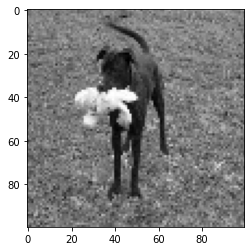

In [28]:
plt.imshow(train_df.iloc[15550].to_numpy().reshape(MODIFIED_WIDTH,MODIFIED_HEIGHT), cmap = 'gray')

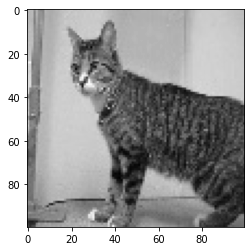

In [29]:
plt.imshow(test_df.iloc[987].to_numpy().reshape(MODIFIED_WIDTH,MODIFIED_HEIGHT), cmap = 'gray')

## K-MEANS

In [3]:
from sklearn.cluster import KMeans

In [50]:
train = train_df.values
test = test_df.values

In [44]:
train

array([[168, 173, 178, ...,   2,   2,   2],
       [ 44,  43,  43, ...,  90,  18,  34],
       [ 38,  27,  42, ..., 168, 171, 153],
       ...,
       [ 42,  35,  47, ..., 128, 114, 167],
       [254, 250, 246, ..., 118, 115, 119],
       [239, 241, 243, ..., 254, 254, 254]], dtype=uint8)

In [45]:
train.shape

(25000, 10000)

In [46]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(train)

NameError: name 'KMeans' is not defined

In [27]:


kmeans.labels_

array([2, 3, 0, ..., 2, 2, 1])

In [142]:
kmeans.inertia_

2015002512005.5488

In [145]:
silhouette_score(TRAIN_VALUES, kmeans.labels_)

0.11115547131711155

In [148]:
silhouette_score(TEST_VALUES, kmeans.predict(test))

0.10913124113440027

## MiniBatchK-Means

In [1]:
from sklearn.cluster import MiniBatchKMeans

In [157]:
MBKmeans = MiniBatchKMeans(n_clusters=2, init='k-means++', random_state=42).fit(TRAIN_VALUES)

AttributeError: 'NoneType' object has no attribute 'split'